In [1]:
import pandas as pd

In [2]:
Hdf = pd.read_csv('housing.csv')

In [3]:
Hdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
Hdf.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
Hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
Hdf.shape

(20640, 10)

In [7]:
Hdf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
Hdf.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Handling of missing Values

In [9]:
numerical_cols = ["longitude","latitude","housing_median_age",
                  "total_rooms","total_bedrooms","population","households",
                  "median_income","median_house_value"]
for column in numerical_cols:
    Hdf[column].fillna(Hdf[column].median(),inplace = True)
    
categorical_col = ["ocean_proximity"]
for column in categorical_col:
    Hdf[column].fillna(Hdf[column].mode()[0],inplace = True)

In [10]:
Hdf.shape

(20640, 10)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vikra\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


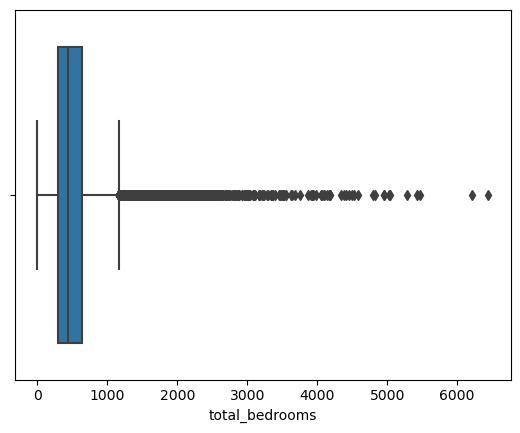

In [12]:
sns.boxplot(x=Hdf["total_bedrooms"],orient='h')
plt.show()

In [13]:
for cols in Hdf.columns[::]:
    if Hdf[cols].dtype == object:
        continue
    else:
        Q1 = Hdf[cols].quantile(q=0.25)
        Q3 = Hdf[cols].quantile(q=0.75)
        iqr = Q3-Q1
    
        low = Q1-1.5*(Q3-Q1)
        high = Q3+1.5*(Q3-Q1)
        Hdf.loc[(Hdf[cols]<low) | (Hdf[cols]>high),cols]=Hdf[cols].median()

C:\Users\vikra\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


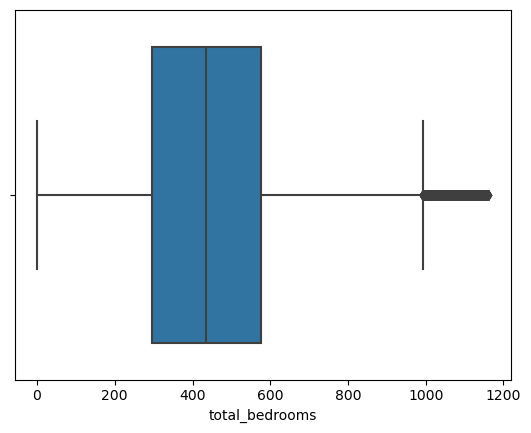

In [14]:
sns.boxplot(x=Hdf['total_bedrooms']) 
plt.show()

In [15]:
Hdf = Hdf.drop('ocean_proximity', axis=1)

In [39]:
Hdf.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.005390,0.034795,0.100066,0.038069,-0.014327,-0.045740
latitude,-0.924664,1.000000,0.011173,-0.013340,-0.048306,-0.124280,-0.069907,-0.079946,-0.144964
housing_median_age,-0.108197,0.011173,1.000000,-0.267249,-0.225717,-0.217385,-0.211539,-0.154865,0.056833
total_rooms,0.005390,-0.013340,-0.267249,1.000000,0.786612,0.692752,0.789080,0.217263,0.170868
total_bedrooms,0.034795,-0.048306,-0.225717,0.786612,1.000000,0.745811,0.936876,-0.001379,0.086226
population,0.100066,-0.124280,-0.217385,0.692752,0.745811,1.000000,0.790705,0.004966,0.018066
households,0.038069,-0.069907,-0.211539,0.789080,0.936876,0.790705,1.000000,0.028237,0.107163
median_income,-0.014327,-0.079946,-0.154865,0.217263,-0.001379,0.004966,0.028237,1.000000,0.578965
median_house_value,-0.045740,-0.144964,0.056833,0.170868,0.086226,0.018066,0.107163,0.578965,1.000000


<Axes: >

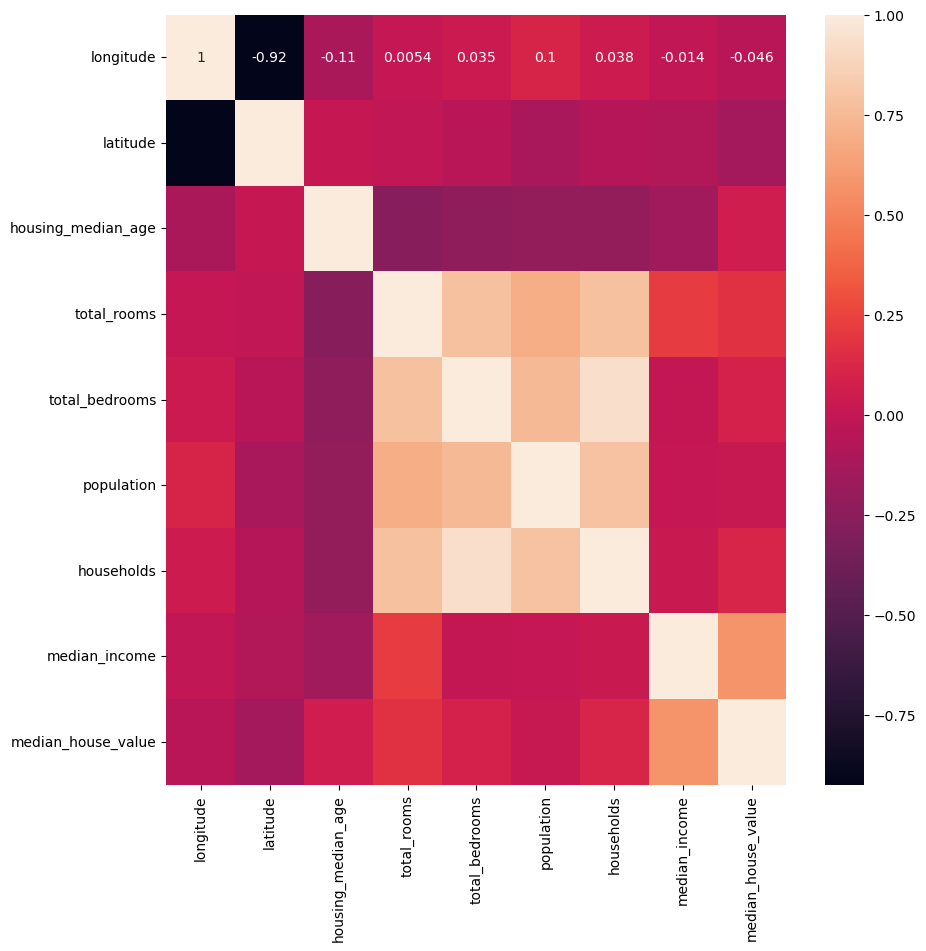

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
sns.heatmap(Hdf.corr(), annot = True,)

In [18]:
x = Hdf.drop('total_bedrooms', axis = 1)
y = Hdf['total_bedrooms']
x.shape

(20640, 8)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
Reg_predict=reg.predict(x_test)
Reg_predict_train=reg.predict(x_train)

In [23]:
from sklearn import metrics
print("R score_test =",metrics.r2_score(y_test,Reg_predict))
print("R score_train =",metrics.r2_score(y_train,Reg_predict_train))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score_test = 0.8646980624054013
R score_train = 0.8936786031077787
MSE =  6906.79404279698


In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

Lasso()

In [25]:
# Test
lasso_reg.score(x_test,y_test)

0.8646561137093443

In [26]:
# Train
lasso_reg.score(x_train,y_train)

0.8934921605926757

In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

Ridge()

In [28]:
# Test
ridge_reg.score(x_test,y_test)

0.8646981391616093

In [29]:
# Train
ridge_reg.score(x_train,y_train)

0.8936786030633423

In [30]:
from sklearn.linear_model import ElasticNet
En_reg = ElasticNet()
En_reg.fit(x_train, y_train)

ElasticNet()

In [31]:
 # Test
En_reg.score(x_test,y_test)

0.8644483247834664

In [32]:
# Train
En_reg.score(x_train,y_train)

0.8930786341811574

### Simple Regression

In [33]:
x = Hdf['households'].values.reshape(-1,1)
y = Hdf['total_bedrooms'].values
print(x.shape)
print(y.shape)

(20640, 1)
(20640,)


In [34]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(scaled,y, test_size = 0.2, random_state = 40)

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
Reg_predict=reg.predict(x_test)
Reg_predict_train=reg.predict(x_train)

In [38]:
from sklearn import metrics
print("R score_test =",metrics.r2_score(y_test,Reg_predict))
print("R score_train =",metrics.r2_score(y_train,Reg_predict_train))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score_test = 0.8555160958247027
R score_train = 0.8832281321139734
MSE =  7375.508336237088
